# Assignment 2

## 1. Download the Dataset

[Churn Modeling](https://drive.google.com/file/d/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy/view)

In [1]:
!wget --user-agent="Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36" "https://doc-14-ac-docs.googleusercontent.com/docs/securesc/gdpdb0igkbt4ar76inmqm466kdfjufk5/fmtu107f9e9nldlptne05n58qr1lkbc4/1664328825000/05151630273286465793/15363333525136285584Z/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy?e=download&uuid=6bc55a47-24fa-4498-b84a-82afd8e00b38"

--2022-09-29 05:15:30--  https://doc-14-ac-docs.googleusercontent.com/docs/securesc/gdpdb0igkbt4ar76inmqm466kdfjufk5/fmtu107f9e9nldlptne05n58qr1lkbc4/1664328825000/05151630273286465793/15363333525136285584Z/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy?e=download&uuid=6bc55a47-24fa-4498-b84a-82afd8e00b38
Resolving doc-14-ac-docs.googleusercontent.com (doc-14-ac-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-14-ac-docs.googleusercontent.com (doc-14-ac-docs.googleusercontent.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-09-29 05:15:31 ERROR 403: Forbidden.



## 2. Load the Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cd 
df = pd.read_csv("/content/drive/MyDrive/Undergrad/IBM-Project/Assignments/Churn_Modelling.csv")
df.describe()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Dropping unnecessary columns
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df.describe()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Visualizations

### (i) Univariate Analysis

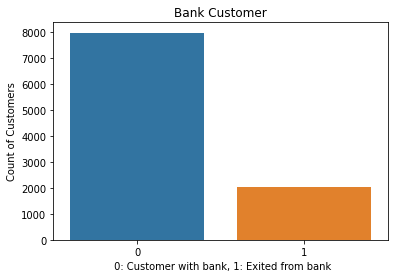

In [6]:
sns.countplot(x="Exited",data=df)
plt.xlabel(" 0: Customer with bank, 1: Exited from bank")
plt.ylabel("Count of Customers")
plt.title("Bank Customer")
plt.show()

### (ii) Bi-variate Analysis

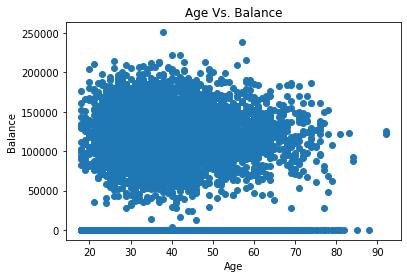

In [7]:
plt.scatter(df["Age"], df["Balance"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age Vs. Balance")
plt.show()

### (iii) Multi-variate Analysis

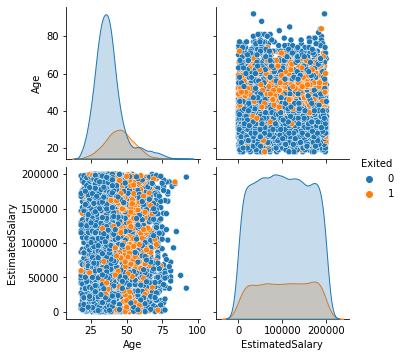

In [8]:
sns.pairplot(df[["Age", "Gender", "EstimatedSalary", "Exited"]], hue="Exited")
plt.show()

## 4. Descriptive Statistics

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handling the Missing Values

In [10]:
# Find null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Fill null values, if any, with corresponding feature mean/mode values appropriately
df["CreditScore"].fillna(df["CreditScore"].mean(), inplace=True)
df["Geography"].fillna(df["Geography"].mode(), inplace=True)
df["Gender"].fillna(df["Gender"].mode(), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Tenure"].fillna(df["Tenure"].mean(), inplace=True)
df["Balance"].fillna(df["Balance"].mean(), inplace=True)
df["NumOfProducts"].fillna(df["NumOfProducts"].mode(), inplace=True)
df["HasCrCard"].fillna(df["HasCrCard"].mode(), inplace=True)
df["IsActiveMember"].fillna(df["IsActiveMember"].mode(), inplace=True)
df["EstimatedSalary"].fillna(df["EstimatedSalary"].mean(), inplace=True)
df["Exited"].fillna(df["Exited"].mode(), inplace=True)
df.describe()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 6. Find and Replace the outliers

In [12]:
# List out the numeric features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
# Find the outliers (visually)
df[numeric_features]
fig = plt.figure(figsize =(5, 3)) 
a = fig.add_axes([0, 0, 1, 1])
a.boxplot(df[numeric_features])

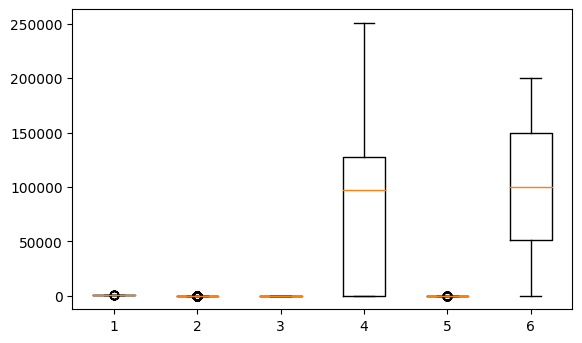

In [14]:
# Eliminate outliers based on Inter-Quartile Range
outlier_features = ['CreditScore', 'Age', 'NumOfProducts']
for col in outlier_features:
    for col_explicit in [col]:
        q75, q25 = np.percentile(df.loc[:, col_explicit], [75, 25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[col_explicit] < min,col_explicit] = df[col].mode()
        df.loc[df[col_explicit] > max,col_explicit] = df[col].mode()

In [ ]:
# Plot after removing outliers
fig = plt.figure() 
a = fig.add_axes([0, 0, 1, 1])
bp = a.boxplot(df[numeric_features])

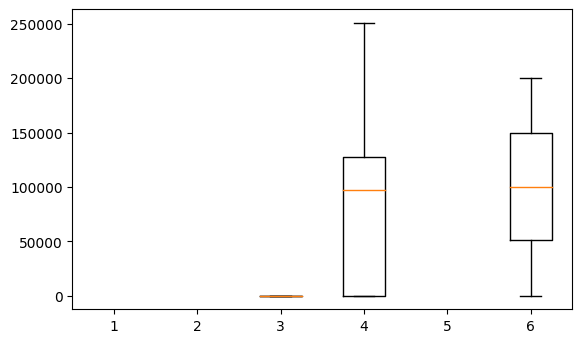

## 7. Check for Categorical columns and perform encoding

In [17]:
# Extract and Encode `geography` categorical data
geography = pd.get_dummies(df["Geography"], drop_first=False)
print(geography)

      France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]


In [18]:
# Extract and Encode `gender` categorical data
gender = pd.get_dummies(df["Gender"], drop_first=False)
print(gender)

      Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[10000 rows x 2 columns]


In [19]:
df = pd.concat([df, gender, geography], axis=1)
df.describe()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1,1,0,1,0,0
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0,1,0,0,0,1
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1,1,0,1,0,0
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0,1,0,1,0,0
4,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0,1,0,0,0,1


In [20]:
# Merge back the encoded values into the dataset
df.drop(["Gender", "Geography"], axis=1, inplace=True)
df.describe()
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619.0,42.0,2,0.00,1.0,1,1,101348.88,1,1,0,1,0,0
1,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,1,0,0,0,1
2,502.0,42.0,8,159660.80,3.0,1,0,113931.57,1,1,0,1,0,0
3,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,1,0,1,0,0
4,850.0,43.0,2,125510.82,1.0,1,1,79084.10,0,1,0,0,0,1


## 8. Split the data into dependent and independent variables

In [21]:
# Independent variables
x = df.drop(['Exited'],axis=1)
print(x.shape)

(10000, 13)


In [22]:
# Dependent variables
y = df['Exited']
print(y.shape)

(10000,)


## 9. Scale the independent variables

In [23]:
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-0.3327168   0.47806838 -1.04175968 ...  0.99720391 -0.57873591
  -0.57380915]
 [-0.44721972  0.36446646 -1.38753759 ... -1.00280393 -0.57873591
   1.74273971]
 [-1.55061149  0.47806838  1.03290776 ...  0.99720391 -0.57873591
  -0.57380915]
 ...
 [ 0.60412526 -0.20354316  0.68712986 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 1.25991471  0.47806838 -0.69598177 ... -1.00280393  1.72790383
  -0.57380915]
 [ 1.46810183 -1.11235856 -0.35020386 ...  0.99720391 -0.57873591
  -0.57380915]]


## 10. Split the data into training and testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=0)
print("Train Features Size:", x_train.shape)
print("Train Target Size:", y_train.shape)
print("Test Features Size:", x_test.shape)
print("Test Target Size:", y_test.shape)

Train Features Size: (2500, 13)
Train Target Size: (2500,)
Test Features Size: (7500, 13)
Test Target Size: (7500,)
